# ----------------------------`ML-Driven Bank Churn Prediction`----------------------------
### Unlocking Customer Retention Insights, Analyzing Demographic and Financial Factors

## `Problem Statement`:
Customer churn is a significant issue for banks, impacting revenue and customer lifetime value. The goal is to develop a machine learning model that predicts whether a customer will churn (leave the bank) based on their demographic, financial, and account activity data.

## `Objective`:
- Build a predictive model to classify customers as likely to churn (Exited = 1) or stay (Exited = 0).
- Identify key factors influencing customer attrition.
- Provide actionable insights for customer retention strategies.

## `Data Dictionary`:
- The dataset consists of **10,000 records with 13 features**:
- **CustomerId**: Unique identifier for each customer.
- **Lastname**: Customer's last name (not useful for prediction).
- **CreditScore**: Customer's credit rating.
- **Geography**: Country of the customer (France, Spain, Germany).
- **Gender**: Male or Female.
- **Age**: Customer's age.
- **Tenure**: Number of years the customer has been with the bank.
- **Balance**: Account balance.
- **NumOfProducts**: Number of products the customer has with the bank.
- **HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 = No).
- **IsActiveMember**: Whether the customer is an active member (1 = Yes, 0 = No).
- **EstimatedSalary**: Customer's estimated salary.
- **Exited**: Target variable (1 = Churned, 0 = Stayed).

### Importing libraries

In [58]:
# EDA and Data Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA Automation
from ydata_profiling import ProfileReport 

# Statistical Analysis
import scipy.stats
import scipy.stats as stats
from scipy.stats import chi2_contingency      # Hypothesis test (Chi-square)
from scipy.stats import f_oneway              # Hypothesis test (One-way ANOVA)

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report,precision_recall_curve, average_precision_score, confusion_matrix

# Immabalance Data handling
from imblearn.over_sampling import SMOTE

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

#### Importing Data

In [2]:
bank = pd.read_csv('G:/Bank_Churn.csv')
print(bank.shape)
bank.head()

(10000, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Making a copy of dataset if needed for future use
new_bank = bank.copy()

In [4]:
bank.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
bank.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### No Null values found

In [6]:
bank.duplicated().sum()

0

##### No duplicate values found

In [7]:
bank['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

##### Overall info about the data

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


##### Value counts check

In [9]:
for i in bank.columns:
    print('********************************',i,'***************************************')
    print(bank[i].value_counts())
    print()

******************************** CustomerId ***************************************
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

******************************** Surname ***************************************
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

******************************** CreditScore ***************************************
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

******************************** Geography ***************************************
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dt

##### Target feature is imbalanced having 80% of customers churned and 20% not churned

In [10]:
!pip install pydantic-settings

In [11]:
profile = ProfileReport(bank)
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# CustomerId and Surnames doesn't add much value to our analysis part. Hence, we will drop these two columns.
bank.drop(columns=['CustomerId', 'Surname'], inplace = True)

In [13]:
# Rechecking the columns
bank.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [14]:
from ydata_profiling import ProfileReport

profile = ProfileReport(bank)
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### 5 Point summary of the data

In [15]:
bank.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## ********************************** *`Exploratory Data Analysis`* ************************************

### `Univariate Analysis`

#### `Distribution of Numerical features`

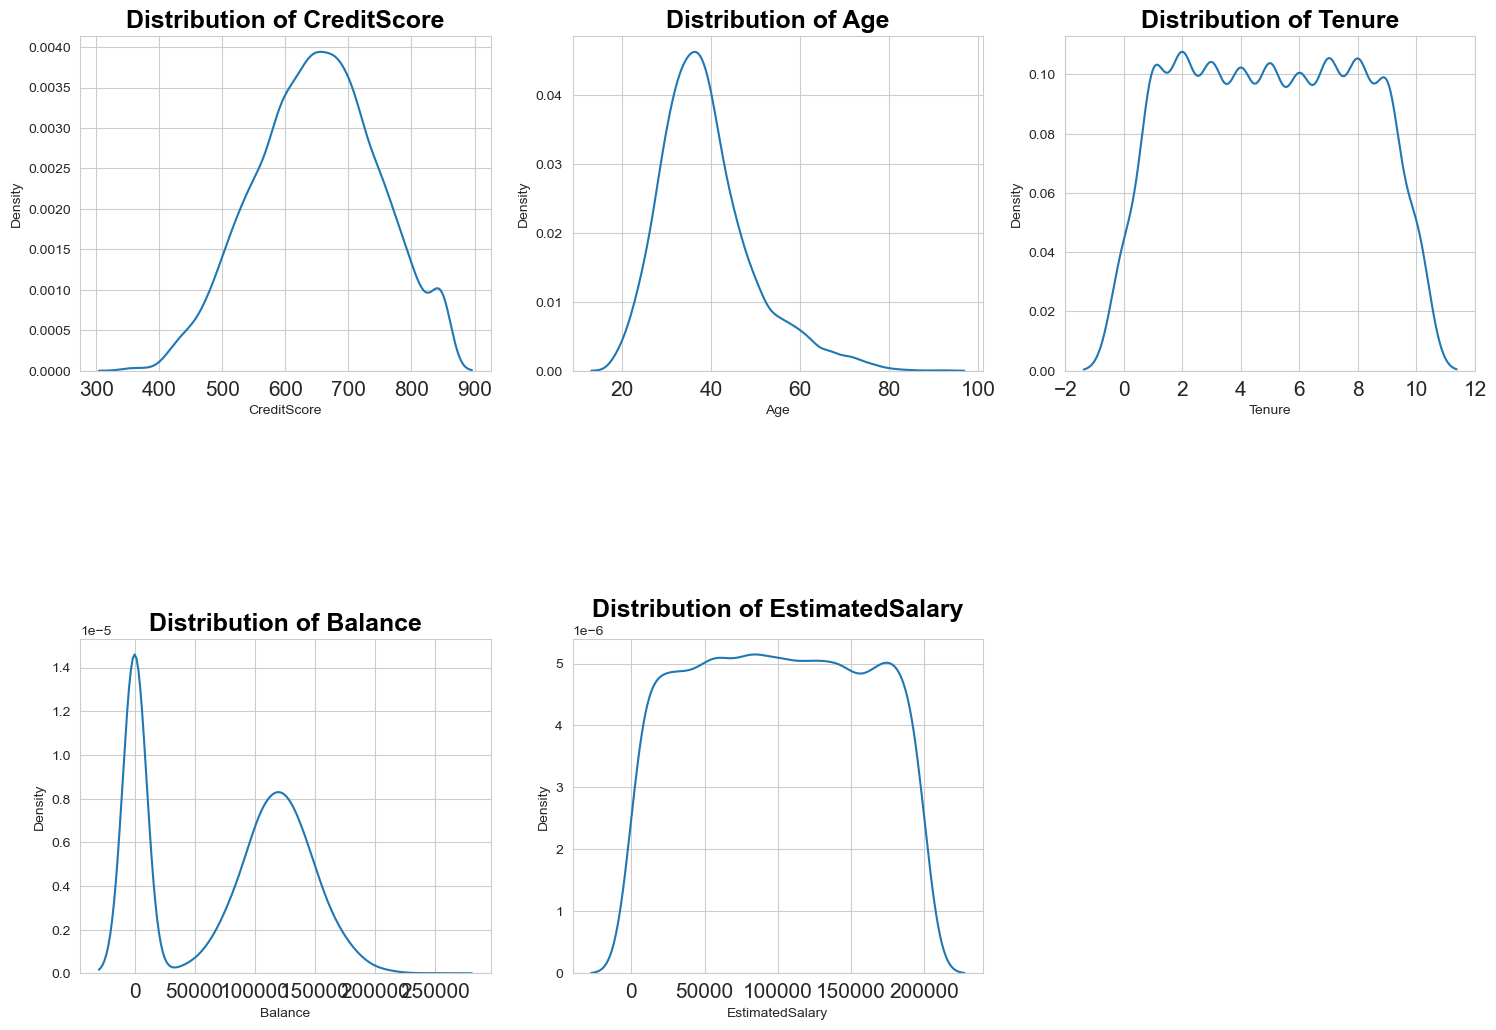

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

sns.set_style('whitegrid')
plt.figure(figsize=(18,20))
plt.subplots_adjust(hspace=0.8)
for i in range(len(numeric)):
    plt.subplot(3,3, i+1)
    plt.xticks(fontsize=15)
    plt.title(f"Distribution of {numeric[i]}", fontsize=18, fontweight="bold", color="black")
    sns.kdeplot(x=bank[numeric[i]])

##### Observations:
- Credit score follows a fairly *Normal Distribution*
- Age is *Positively skewed* showing potential outliers.
- Tenure is distributed *Uniformly*
- Balance has *Bi-modal* distribution. Where majority of the customers has zero balance.
- Estimated salary of customers is *Uniformaly Distributed*

#### `Distribution of Categorical features`

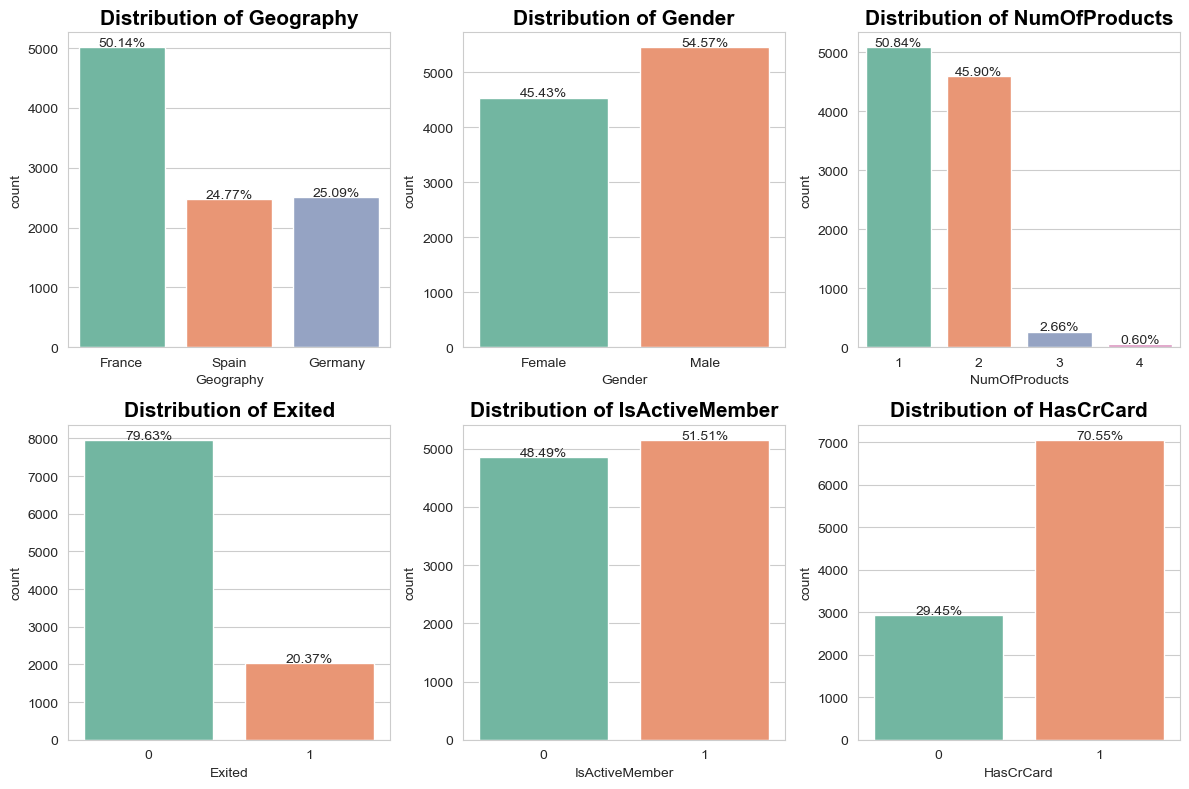

In [17]:
categorical = ['Geography', 'Gender', 'NumOfProducts', 'Exited', 'IsActiveMember', 'HasCrCard']

sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
for i in range(len(categorical)):
    plt.subplot(2,3, i+1)
    axis = sns.countplot(x=bank[categorical[i]], palette="Set2")
    plt.xticks(fontsize=10)
    plt.title(f"Distribution of {categorical[i]}", fontsize=15, fontweight="bold", color="black")
    total = len(bank)
    for i in axis.patches:
        count = i.get_height()
        percent = f'{count*100/total:.2f}%'
        x = i.get_x() + i.get_width() / 2
        y = count
        axis.text(x, y+20, percent, ha='center', fontsize=10)
    
plt.tight_layout()
plt.show()

##### Observations:
- *50%* customers are from *France* while equal number of customers are based out of Spain and Germany.
- Number of males are higher than that of females.
- Majority of the customers are having only *1-2 products* with the bank.
- There is *20% churn* seen in the bank.
- There is *Equal proportion* between Customers who are Active and who are Inactive.
- *70%* of the customers owns a Credit card.

### `Bi-variate Analysis`

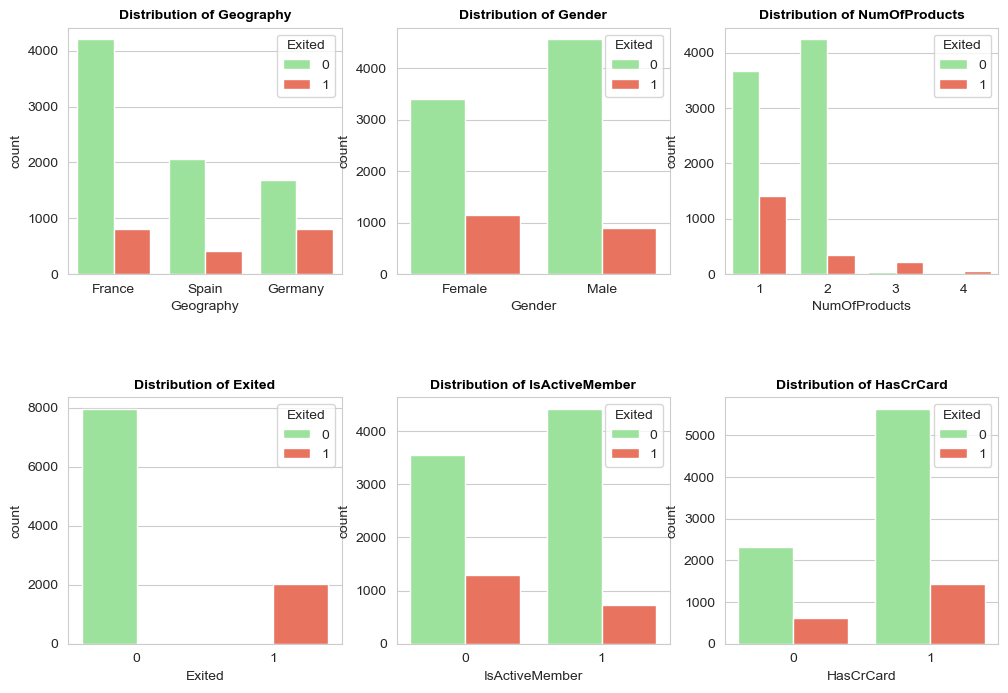

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
for i in range(len(categorical)):
    plt.subplot(2,3, i+1)
    plt.xticks(fontsize=10)
    plt.title(f"Distribution of {categorical[i]}", fontsize=10, fontweight="bold", color="black")
    sns.countplot(bank, x=bank[categorical[i]], hue =bank['Exited'], palette=['lightgreen','tomato'])

In [19]:
# Calculating Churn rate for each Category and their sub categories.

categorical = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember', 'HasCrCard']

for col in categorical:
    churn_data = bank.groupby(col)['Exited'].value_counts(normalize=True).unstack().fillna(0) * 100
    churn_rate = churn_data[1]  # Only taking percentage where Exited == 1
    print(f"\nChurn Rate by {col}:\n")
    print(churn_rate.round(2).astype(str) + '%')


Churn Rate by Geography:

Geography
France     16.15%
Germany    32.44%
Spain      16.67%
Name: 1, dtype: object

Churn Rate by Gender:

Gender
Female    25.07%
Male      16.46%
Name: 1, dtype: object

Churn Rate by NumOfProducts:

NumOfProducts
1    27.71%
2     7.58%
3    82.71%
4    100.0%
Name: 1, dtype: object

Churn Rate by IsActiveMember:

IsActiveMember
0    26.85%
1    14.27%
Name: 1, dtype: object

Churn Rate by HasCrCard:

HasCrCard
0    20.81%
1    20.18%
Name: 1, dtype: object


##### Observations:
- Germany has the highest churn among other countries
- Females are leaving more than males
- Though customer with 3-4 products are less, their churn rate is the highest. Which is a matter of concern. People with only one product are seen leaving as well.
- Active members are also leaving the bank.
- Equal churn rate is seen among customers who owns a Credit card and the ones who doesn't.

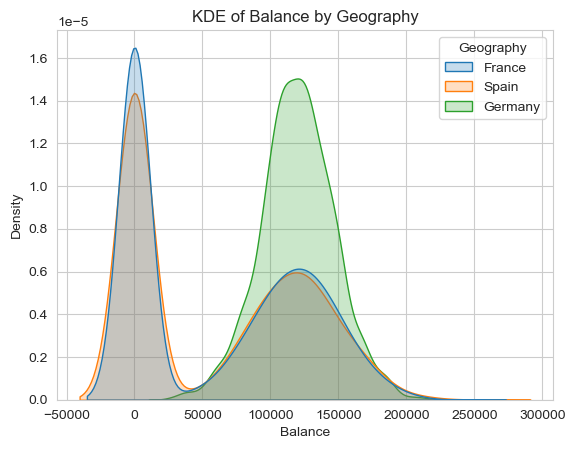

In [20]:
sns.kdeplot(data=bank, x='Balance', hue='Geography', common_norm=False, fill=True)
plt.title("KDE of Balance by Geography")
plt.show()

##### Observations:
- France & Spain: Most customers have zero balance. Their KDE peaks sharply at 0.
- Germany: A large number of customers have higher balances (around 125K). Their curve peaks much later.

### `Multivariate Analysis`

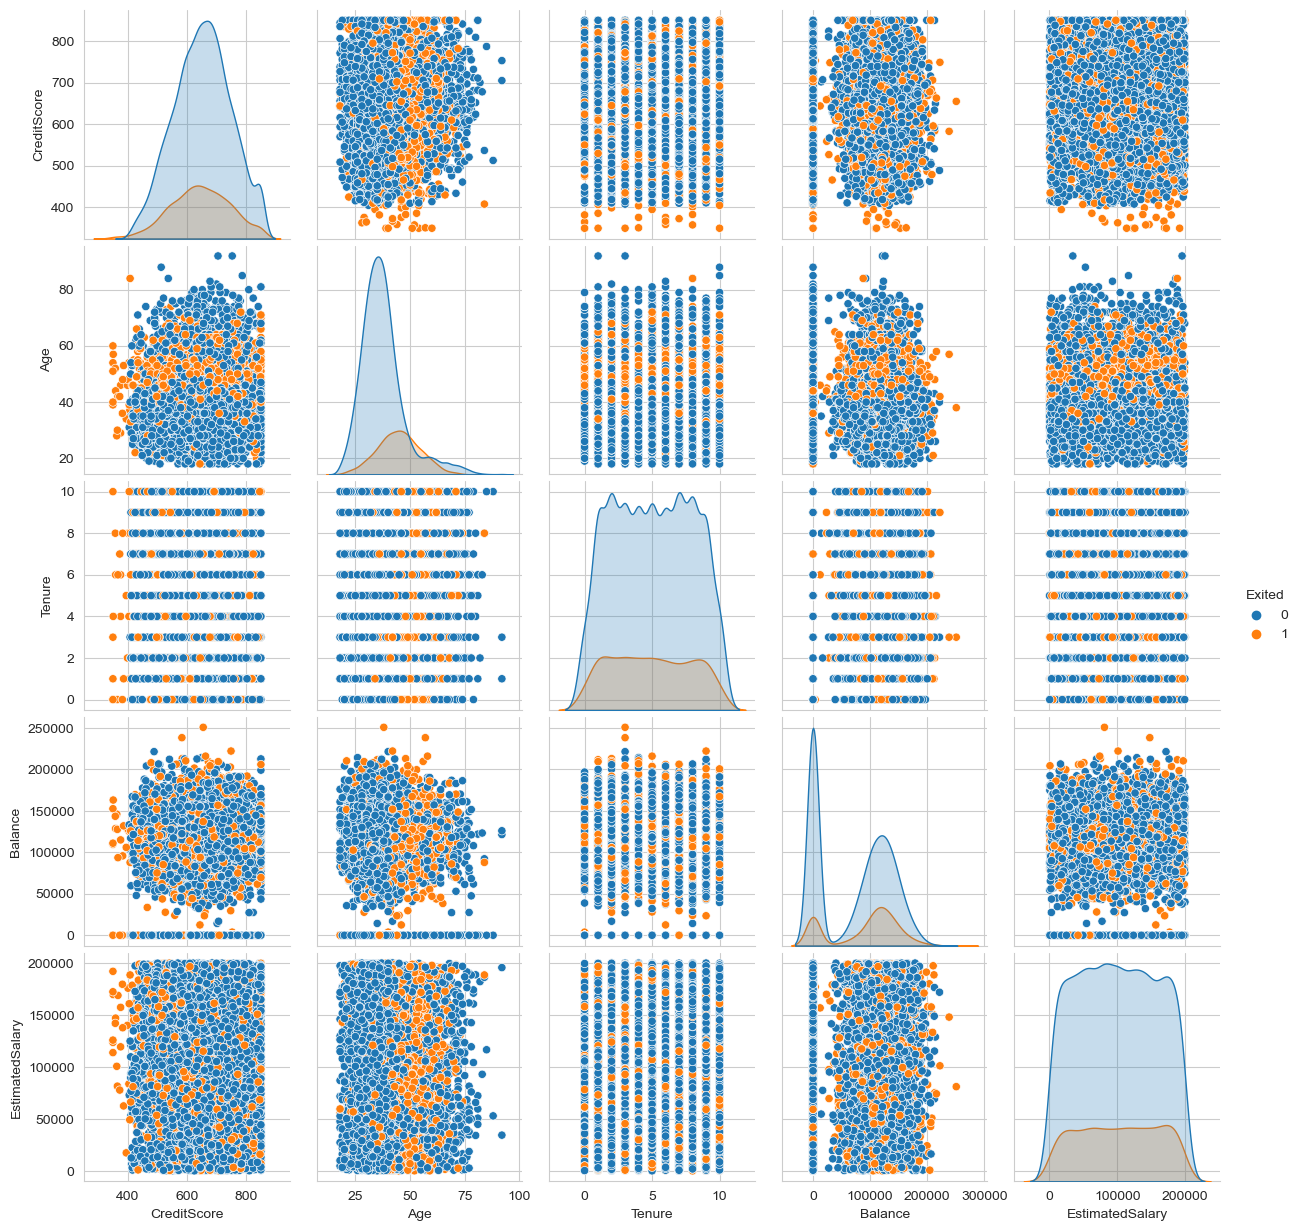

In [21]:
sns.pairplot(bank, hue='Exited', vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
plt.show()

##### Observations:
- Customers between the age 40 - 60 are churning more.
**No strong pattern** is seen in rest of the categories.

### 1. Churn Rate by Age Groups + Gender

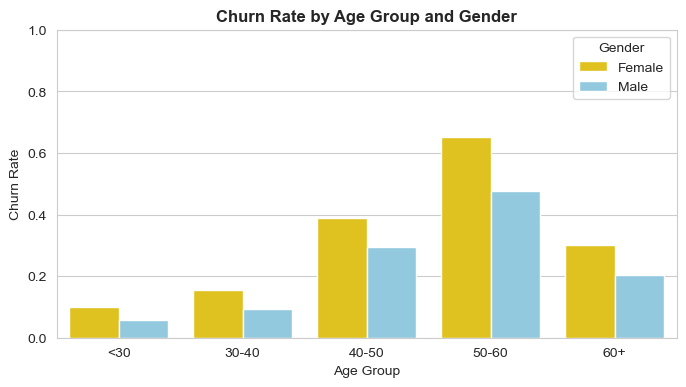

In [22]:
# Age group bins
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
bank['AgeGroup'] = pd.cut(bank['Age'], bins=bins, labels=labels)

# Group by AgeGroup and Gender
churn_by_age_gender = bank.groupby(['AgeGroup', 'Gender'])['Exited'].mean().reset_index()

# Plot
plt.figure(figsize=(8,4))
sns.barplot(data=churn_by_age_gender, x='AgeGroup', y='Exited', hue='Gender', palette=['gold','skyblue'])
plt.title('Churn Rate by Age Group and Gender', fontweight="bold")
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

##### Observation:
- The highest churn rate is seen between the age 40 - 60. Where Females churn rate is higher than *60% between the age group 50-60* followed by the age group 40-50 which is around 40%. 

###  2. Churn Rate by Number of Products + Active Status

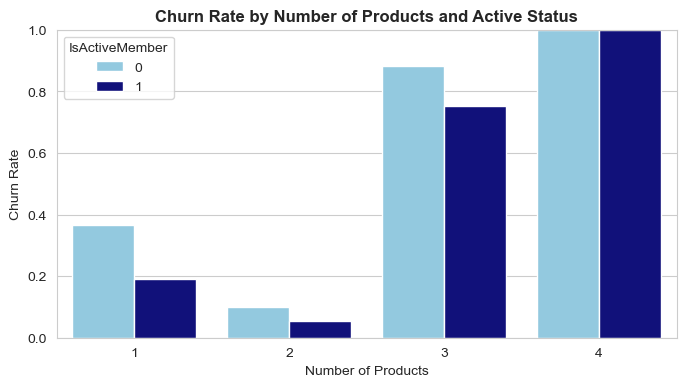

In [23]:
# Group by NumOfProducts and IsActiveMember
# It shows percentage of customers churned in each group.

# Calculating churn rate per group by taking the average of churns
churn_by_products_active = bank.groupby(['NumOfProducts', 'IsActiveMember'])['Exited'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=churn_by_products_active, x='NumOfProducts', y='Exited', hue='IsActiveMember', palette=['skyblue','darkblue'])
plt.title('Churn Rate by Number of Products and Active Status', fontweight="bold")
plt.ylabel('Churn Rate')
plt.xlabel('Number of Products')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

##### Observation:
- We observe a significantly high churn rate with almost a 100% churn by customers who were using 4 products, followed by people with 3 products.

### 3. Checking Correlation

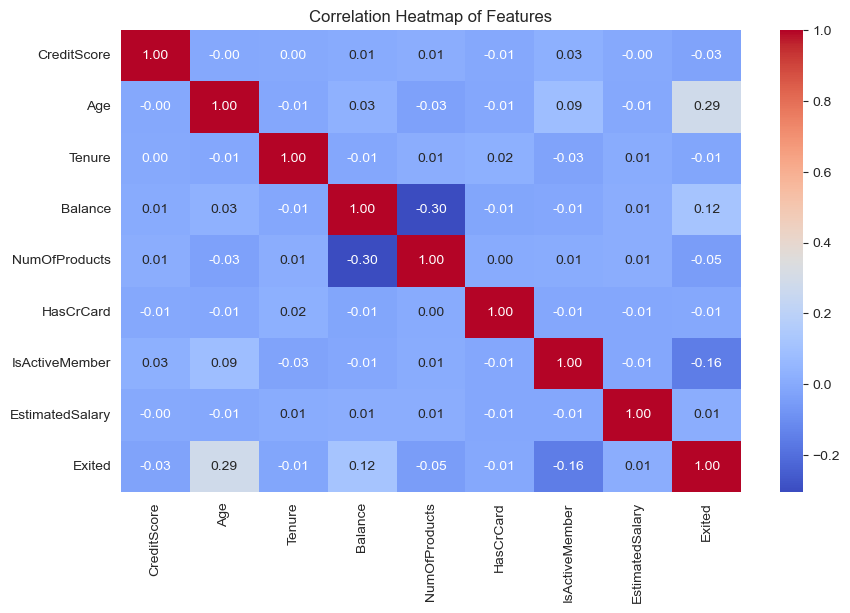

In [24]:
# Only numeric columns
numeric_features = bank.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_features.corr()

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

##### Observations:
- **No strong Multicolinearity** found between the features.

### Outliers Check

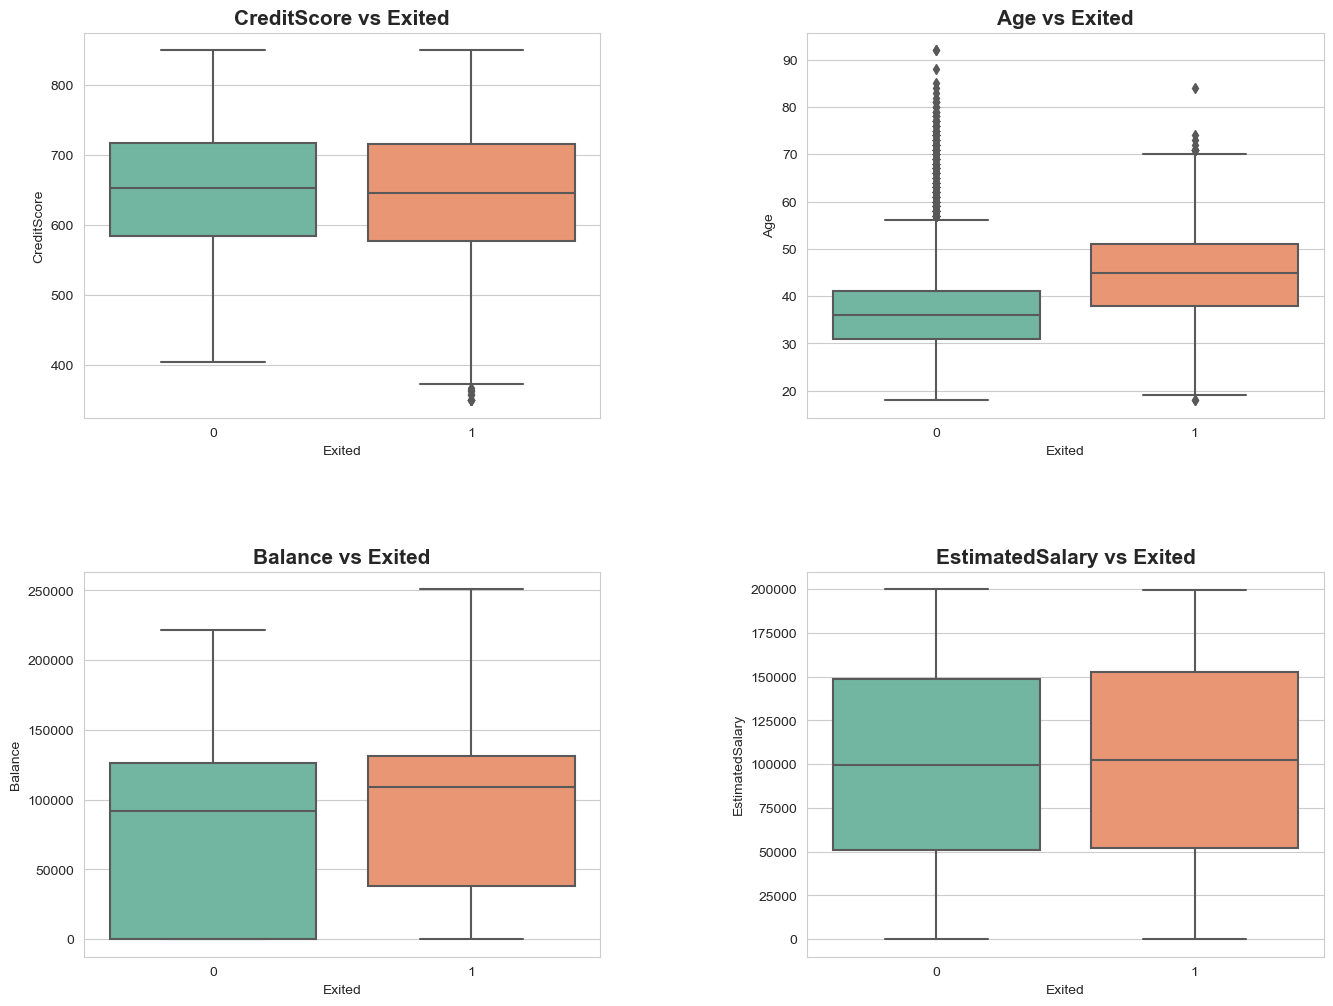

In [25]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(len(numeric)):
    plt.subplot(2,2, i+1)
    sns.boxplot(data=bank, x='Exited', y= numeric[i], palette='Set2')
    plt.title(f'{numeric[i]} vs Exited', fontsize=15, fontweight='bold')
    plt.xlabel('Exited')
    plt.ylabel(numeric[i])

plt.show()

In [26]:
# Creating a funtion to check outliers so that we can use it for multiple variables in our data.

def outliers(a):
    summary = bank[a].describe()

    Q1 = summary.loc['25%']   # Q1
    Q3 = summary.loc['75%']   # Q3

    IQR = Q3 - Q1             # IQR

    LL = Q1 - 1.5 * IQR         # Lower Limit
    UL = Q1 + 1.5 * IQR         # Upper Limit

    ol = bank[(bank[a] < LL) | (bank[a] > UL)]
    return ol

In [27]:
# Checking the number of outliers in each feature

print('Outliers in Age:',outliers('Age').shape)
print('Outliers in Balance:',outliers('Balance').shape)
print('Outliers in CreditScore:',outliers('CreditScore').shape)
print('Outliers in EstimatedSalary:',outliers('EstimatedSalary').shape)

Outliers in Age: (1261, 12)
Outliers in Balance: (59, 12)
Outliers in CreditScore: (887, 12)
Outliers in EstimatedSalary: (75, 12)


In [28]:
above_60 = bank[bank['Age'] > 60]
print(above_60.shape)

above_70 = bank[bank['Age'] > 70]
print(above_70.shape)

(464, 12)
(133, 12)


##### Observations:
- In the age column, out of total **1261 outliers**, only 464 are above the age of 60 and 133 are above the age of 70, we don't need capping for this variable.
- Since there is no significant amount of outliers present in our data. We will keep all the outliers *as it is*.

## ************************************** *`Statistical Analysis`* ****************************************

### `Hypothesis Testing`

### 1. First Hypothesis :
#### Does having multiple products (3 or more) significantly increase the likelihood of churn among high-balance customers (>100K)?
_**Why it is important?**_ : Losing high-value, multi-product customers is a serious revenue risk.

#### 1.Framing the Hypothesis

`Null Hypothesis (Ho)`: There is no significant association between being a high-balance, multi-product customer and the Churn rate.

`Alternate Hypothesis (H1)`: There is a significant association between them. The high-balance multi-products) are churning more.

Here, we are comparing categorical variables where, Exited (1/0), Balance(High balance group) and product count.
Hence, we will use a **Chi-square test**.


#### 2. Creating Segment
- Independent: NumOfProducts
- Dependent: Exited (Churn)
- Control: Balance Brackets (>100K), IsActiveMember

In [29]:
bank['HighValueCust'] = np.where((bank['Balance'] > 100000) & (bank['NumOfProducts'] > 2), 'Yes', 'No')

contingency1 = pd.crosstab(bank['HighValueCust'], bank['Exited'])
print(contingency1)

Exited            0     1
HighValueCust            
No             7955  1877
Yes               8   160


#### 3. Chi-square test

In [30]:
alpha = 0.05
chi2_1, p_val1, dof, expected = chi2_contingency(contingency1)
print('Chi-square value:', chi2_1)
print('p value:', p_val1)
if p_val1 < alpha: print('We reject the Null Hypothesis. There is a significant association between high-value customers and churn.')
else: print('We fail to reject Null Hypothesis. There is No significant association. ')

Chi-square value: 585.7785975665938
p value: 2.075528887199564e-129
We reject the Null Hypothesis. There is a significant association between high-value customers and churn.


#### Conclusion:
We **Rejected** the null hypothesis → There is a **significant association** between high-value customers and churn.
This means high-value customers are churning more than expected and it's not due to chance.

### 2. Second Hypothesis :
#### We are testing whether gender has an effect on churn in the 101K–200K balance group.

_**Why it is important?**_ : Gender-wise churn patterns can guide personalized retention strategies.

#### 1.Framing the Hypothesis

`Null Hypothesis (Ho)`: Gender and churn are independent among customers with balance between 101K–200K.(Churn rate is the same for males and females.)

`Alternate Hypothesis (H1)`: Gender and churn are not independent in this balance group.(Churn rate is different between males and females.)

Here, we are comparing categorical variables where, Exited (1/0), Balance(101K - 200K) among Gender.
Hence, we will use a **Chi-square test**.


#### 2. Creating Segment
- Independent: Gender
- Dependent: Exited
- Control: Balance bracket (101K–200K)

In [31]:
# Filtering the data
Bal_bracket = bank[(bank['Balance'] > 100000) & (bank['Balance'] <= 200000)]

# Creating contingency
contingency2 = pd.crosstab(Bal_bracket['Gender'], Bal_bracket['Exited'])
print(contingency2)
print()

# Chi-square test
chi2_2, p_val2, dof, expected = chi2_contingency(contingency2)
print('Chi-square value:', chi2_2)
print('p value:', p_val2)
if p_val2 < alpha: print('We reject the Null Hypothesis. There is a significant association between Males and Females with balance between 101K - 200K and their Churn rate.')
else: print('We fail to reject Null Hypothesis. There is No significant association. ')

Exited     0    1
Gender           
Female  1489  643
Male    2084  549

Chi-square value: 53.92667851952855
p value: 2.0811262518548585e-13
We reject the Null Hypothesis. There is a significant association between Males and Females with balance between 101K - 200K and their Churn rate.


### 3. Third Hypothesis :
#### Among customers with tenure ≤ 2 years, does inactivity significantly influence churn in the 101K–200K balance bracket?

_**Why it is important?**_ : Spotting risk early in new high-value customers can reduce early attrition.

#### 1.Framing the Hypothesis

`Null Hypothesis (Ho)`: Inactivity does not significantly influence churn among customers with tenure ≤ 2 years and balance between 101K–200K.

`Alternate Hypothesis (H1)`: Inactivity does significantly influence churn among those customers.


#### 2. Creating Segment
- Independent: IsActiveMember
- Dependent: Exited
- Control: Tenure (≤2), Balance (101K–200K)

In [32]:
# Filtering the data
Bal_tenure = bank[(bank['Tenure']<=2) & (bank['Balance'] > 100000) & (bank['Balance'] <= 200000)]

# Creating contingency
contingency3 = pd.crosstab(Bal_tenure['IsActiveMember'], Bal_tenure['Exited'])
print(contingency3)

# Chi-square test
chi2_3, p_val3, dof, expected = chi2_contingency(contingency3)
print()
print('Chi-square value:', chi2_3)
print('p value:', p_val3)
if p_val3 < alpha: print('We reject the Null Hypothesis. Inactivity does influence churn. and their Churn rate.')
else: print('We fail to reject Null Hypothesis. No significant effect on churn due to the inactivity. ')

Exited            0    1
IsActiveMember          
0               359  203
1               553  106

Chi-square value: 63.362358465540225
p value: 1.7197305004531516e-15
We reject the Null Hypothesis. Inactivity does influence churn. and their Churn rate.


### 4. Fourth Hypothesis :
####  Is the churn rate of high-balance customers (>100K) significantly higher in Germany compared to France and Spain?

_**Why it is important?**_ : Region-specific issues may require localized solutions.

#### 1.Framing the Hypothesis

`Null Hypothesis (Ho)`:  Churn rate among high-balance customers is the same across Germany, France, and Spain.

`Alternate Hypothesis (H1)`: Churn rate among high-balance customers is not the same across these countries.


#### 2. Creating Segment
- Independent: Geography (Germany vs France vs Spain)
- Dependent: Exited
- Control: Balance > 100K

In [33]:
# Filtering the data
Bal = bank[(bank['Balance'] > 100000)]

# Creating contingency
contingency4 = pd.crosstab(Bal['Geography'], Bal['Exited'])
print(contingency4)

# Chi-square test
chi2_4, p_val4, dof, expected = chi2_contingency(contingency4)
print()
print('Chi-square value:', chi2_4)
print('p value:', p_val4)
if p_val4 < alpha: print('We reject the Null Hypothesis. There is a difference in churn across countries.')
else: print('We fail to reject Null Hypothesis. Churn rates are similar. ')

Exited        0    1
Geography           
France     1565  343
Germany    1260  706
Spain       763  162

Chi-square value: 201.26451361785914
p value: 1.97681563084907e-44
We reject the Null Hypothesis. There is a difference in churn across countries.


### 5. Fifth Hypothesis :
####  Do older customers (age > 40) with medium credit scores (640–660) have significantly higher churn compared to younger customers (age ≤ 40) with same score range?

_**Why it is important?**_ : Combines age and credit score to segment risk behavior.

#### 1.Framing the Hypothesis

`Null Hypothesis (Ho)`:  Age does not affect churn rate among customers with medium credit score (640–660).

`Alternate Hypothesis (H1)`: Older customers churn more than younger ones in this score range.


#### 2. Creating Segment
- Independent: Age Group (<=40 vs >40)
- Dependent: Exited
- Control: CreditScore (640–660)

In [34]:
# Filtering the data
CrScore_Bracket = bank[(bank['CreditScore'] >= 640) & (bank['CreditScore'] <= 660)]
CrScore_Bracket['Age_group'] = np.where(CrScore_Bracket['Age'] >40, 'Older', 'Younger')

# Creating contingency
contingency5 = pd.crosstab(CrScore_Bracket['Age_group'], CrScore_Bracket['Exited'])
print(contingency5)

# Chi-square test
chi2_5, p_val5, dof, expected = chi2_contingency(contingency5)
print()
print('Chi-square value:', chi2_5)
print('p value:', p_val5)
if p_val5 < alpha: print('We reject the Null Hypothesis. Age does influence churn in medium-score group.')
else: print('We fail to reject Null Hypothesis. Age does not significantly impact churn in this group. ')

Exited       0    1
Age_group          
Older      197  108
Younger    480   59

Chi-square value: 71.91272077466272
p value: 2.249292453595296e-17
We reject the Null Hypothesis. Age does influence churn in medium-score group.


### 6. Sixth Hypothesis :
####  Does having a credit card significantly affect churn among active customers with a balance between 50K–150K?

_**Why it is important?**_ : By controlling for activity and balance, we minimize the influence of other factors and ensure a fair comparison between credit card holders and non-holders.


#### 1.Framing the Hypothesis

`Null Hypothesis (Ho)`:  Having a credit card **does not** significantly affect churn among active customers in the 50K–150K balance range.

`Alternate Hypothesis (H1)`: Having a credit card **does** significantly affect churn among active customers in the 50K–150K balance range.




#### 2. Creating Segment
- Independent: HasCrCard, IsActiveMember
- Dependent: Exited
- Control: Balance (50K - 150K)

In [35]:
# Filtering the data
active_bal = bank[(bank['IsActiveMember'] == 1) & (bank['Balance'] >= 50000) & (bank['Balance'] <= 150000)]

# Creating contingency
contingency6 = pd.crosstab(active_bal['HasCrCard'], active_bal['Exited'])
print(contingency6)

# Chi-square test
chi2_6, p_val6, dof, expected = chi2_contingency(contingency5)
print()
print('Chi-square value:', chi2_6)
print('p value:', p_val6)
if p_val6 < alpha: print('We reject the Null Hypothesis. Credit card ownership does impact churn.')
else: print('We fail to reject Null Hypothesis. Credit card does not impact churn. ')

Exited        0    1
HasCrCard           
0           696  152
1          1589  316

Chi-square value: 71.91272077466272
p value: 2.249292453595296e-17
We reject the Null Hypothesis. Credit card ownership does impact churn.


## `ANOVA`
- We are Using ANOVA to compare the mean of a continuous variable across 2 or more groups.
- It will help us to check if at least one group’s mean is significantly different from the others.

### 1. First Hypothesis :
####  Is there a significant difference in average account balance across different geographies (France, Spain, Germany)?

_**Why it is important?**_ : Combines age and credit score to segment risk behavior.

#### 1.Framing the Hypothesis

`Null Hypothesis (Ho)`:  There is **no difference** in average account balance across geographies.

`Alternate Hypothesis (H1)`:  At least **one geography** has a **different** average account balance.

#### 2. Creating Segment
- Dependent: Balance
- Grouping: Geography (France, Germany, Spain)

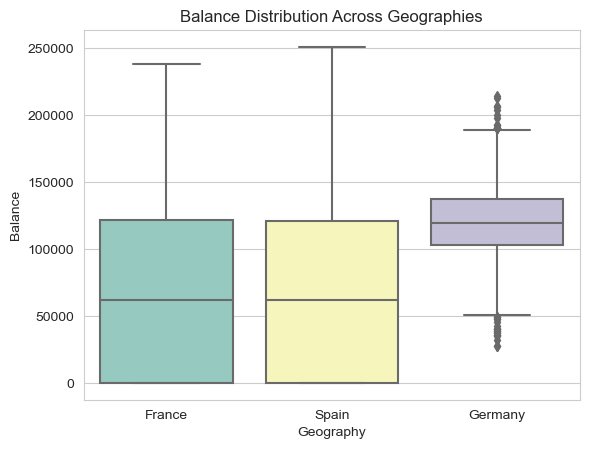

F-statistic: 958.4254463368385
p-value: 0.0

We reject the Null Hypothesis. At least one group has a significantly different mean balance.


In [36]:
#  Boxplot to visualize balance distribution across geographies
sns.boxplot(data=bank, x='Geography', y='Balance', palette='Set3')
plt.title("Balance Distribution Across Geographies")
plt.show()

# Preparing balance data by geography
france_bal = bank[bank['Geography'] == 'France']['Balance']
germany_bal = bank[bank['Geography'] == 'Germany']['Balance']
spain_bal = bank[bank['Geography'] == 'Spain']['Balance']

# Performing ANOVA
f_stat1, p_value1 = f_oneway(france_bal, germany_bal, spain_bal)

print("F-statistic:", f_stat1)
print("p-value:", p_value1)
print()

if p_value1 < alpha: print('We reject the Null Hypothesis. At least one group has a significantly different mean balance.')
else: print('We fail to reject Null Hypothesis. No significant difference. ')

##### Conclusion:
- **F-statistic** tells us how much the means differ relative to the variation within groups.
- **P-value** tells us the significance of that difference.

### 2. Second Hypothesis :
####  Is there a statistically significant difference in average account balance among customers based on their credit card ownership, across different countries?

_**Why it is important?**_ : Reveals whether credit card holders are managing higher or lower balances than non-holders across countries.

#### 1.Framing the Hypothesis

`Null Hypothesis (Ho)`:  There is no significant difference found in balance among credit card holders vs non-holders.

`Alternate Hypothesis (H1)`:  at least one country shows a significant difference in balance among credit card holders vs non-holders.

#### 2. Creating Segment
- Independent: HasCrCard
- Dependent: Balance
- Grouping: Geography (France, Germany, Spain)

In [37]:
# Filtering
france = bank[(bank['Geography'] == 'France') & (bank['HasCrCard'].isin([0,1]))]['Balance']
germany = bank[(bank['Geography'] == 'Germany') & (bank['HasCrCard'].isin([0,1]))]['Balance']
spain = bank[(bank['Geography'] == 'Spain') & (bank['HasCrCard'].isin([0,1]))]['Balance']

# One-Way ANOVA
f_stat2, p_value2 = stats.f_oneway(france, germany, spain)

print("F-statistic:", f_stat2)
print("p-value:", p_value2)
print()
if p_value2 < alpha: print('We reject the Null Hypothesis. at least one country shows a significant difference in balance among credit card holders vs non-holders.')
else: print('We fail to reject Null Hypothesis. No significant difference found. ')

F-statistic: 958.4254463368385
p-value: 0.0

We reject the Null Hypothesis. at least one country shows a significant difference in balance among credit card holders vs non-holders.


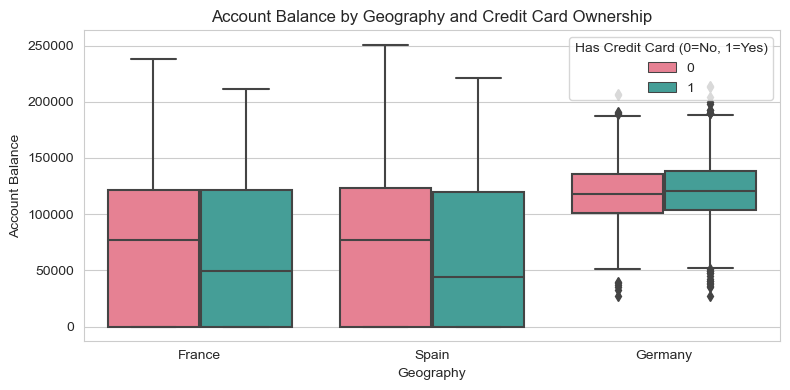

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=bank, x='Geography', y='Balance', hue='HasCrCard', palette='husl')
plt.title('Account Balance by Geography and Credit Card Ownership')
plt.xlabel('Geography')
plt.ylabel('Account Balance')
plt.legend(title='Has Credit Card (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

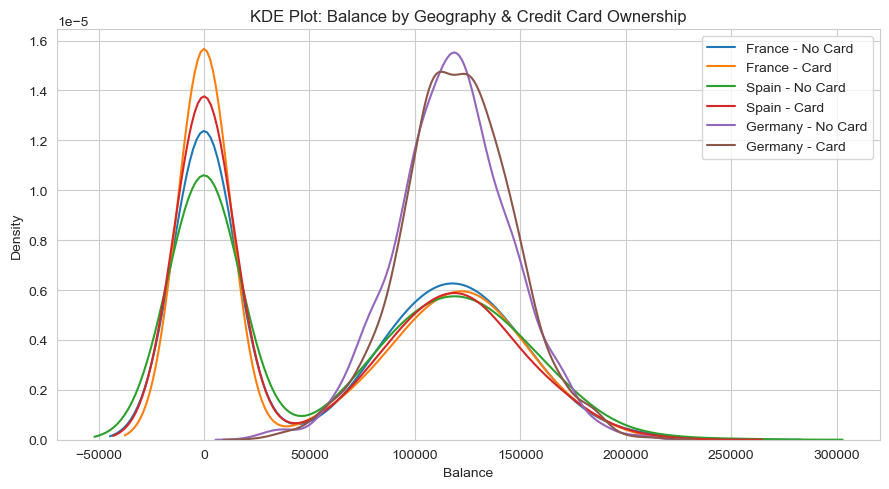

In [39]:
plt.figure(figsize=(9,5))
for country in bank['Geography'].unique():
    for card in [0, 1]:
        subset = bank[(bank['Geography'] == country) & (bank['HasCrCard'] == card)]
        label = f"{country} - {'Card' if card == 1 else 'No Card'}"
        sns.kdeplot(subset['Balance'], label=label)

plt.title("KDE Plot: Balance by Geography & Credit Card Ownership")
plt.xlabel("Balance")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

##### Conclusion:
- **F-statistic** tells us how much the average balances differ between groups (credit card holders vs non-holders) relative to the variation within each group (within each country).
- **P-value** = 0.0 means the difference is highly statistically significant.

## *`Data Preprocessing`*

### Encoding Categorical Variables

In [40]:
# These columns were created while doing analysis. We are now dropping it
bank = bank.drop(columns=['HighValueCust', 'AgeGroup'])

In [41]:
bank = pd.get_dummies(bank, columns=['Geography'], drop_first=True, dtype=int)
bank['Gender'] = bank['Gender'].map({'Male': 1, 'Female': 0})
bank

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0


### Continuing without Handling Imbalance data in target variable

In [42]:
bank['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

### Splitting the data into x and y

In [43]:
bank.shape

(10000, 12)

In [44]:
x = bank.drop(columns=['Exited'])
y = bank['Exited']

print(x.shape)
print(y.shape)

(10000, 11)
(10000,)


### Splitting the data into Train and Test (Before SMOTE)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42, stratify= y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


### Feature Scaling (Before SMOTE)

In [46]:
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled  = sc.transform(x_test)

In [47]:
# Checking x_train_scaled
x_train_scaled

array([[ 1.058568  ,  0.90750738,  1.71508648, ...,  1.04208392,
        -0.57831252, -0.57773517],
       [ 0.91362605,  0.90750738, -0.65993547, ..., -0.62355635,
         1.72916886, -0.57773517],
       [ 1.07927399, -1.10191942, -0.18493108, ...,  0.30812779,
         1.72916886, -0.57773517],
       ...,
       [ 0.16821031, -1.10191942, -0.18493108, ..., -0.55808767,
        -0.57831252, -0.57773517],
       [ 0.37527024,  0.90750738, -0.37493284, ..., -1.35149956,
        -0.57831252,  1.73089688],
       [ 1.56586482,  0.90750738,  1.14508121, ..., -1.02692216,
        -0.57831252,  1.73089688]])

In [48]:
# Checking x_test_scaled
x_test_scaled

array([[-0.68073539,  0.90750738, -0.27993196, ..., -0.09502138,
        -0.57831252, -0.57773517],
       [-1.30191518,  0.90750738, -0.5649346 , ..., -0.778941  ,
         1.72916886, -0.57773517],
       [-0.97061929, -1.10191942,  0.10007155, ...,  0.09946914,
        -0.57831252,  1.73089688],
       ...,
       [-1.39509214, -1.10191942,  0.7650777 , ...,  0.8700859 ,
         1.72916886, -0.57773517],
       [ 0.39597623,  0.90750738,  0.00507067, ..., -1.47935555,
        -0.57831252, -0.57773517],
       [ 1.02750901,  0.90750738, -0.5649346 , ..., -0.49531855,
        -0.57831252, -0.57773517]])

## *************************************** *`Model Building`* ********************************************

### Data Modeling (Before SMOTE)

In [49]:
# Models
models = {'RF': RandomForestClassifier(random_state=42),
          'DT': DecisionTreeClassifier(random_state=42),
          'XGB': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
          'LR': LogisticRegression(max_iter = 1000, random_state = 42),
          'KNN': KNeighborsClassifier()
}

result = []

# Looping through each model
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_test_pred = model.predict(x_test_scaled)
    y_prob = model.predict_proba(x_test_scaled)[:,1] if hasattr(model, 'predict_proba') else y_pred
    
    result.append({'Model': name,
                   'Accuracy': accuracy_score(y_test, y_test_pred),
                   'Precision': precision_score(y_test, y_test_pred),
                   'Recall': recall_score(y_test, y_test_pred),
                   'F1 Score': f1_score(y_test, y_test_pred),
                   'ROC AUC': roc_auc_score(y_test, y_prob)})
    
result_df = pd.DataFrame(result)
result_df = result_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

print(result_df)

  Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0   XGB    0.8530   0.696864  0.491400  0.576369  0.829285
1    RF    0.8615   0.770833  0.454545  0.571870  0.854262
2    DT    0.7860   0.476510  0.523342  0.498829  0.688224
3   KNN    0.8240   0.622222  0.343980  0.443038  0.753076
4    LR    0.8080   0.589147  0.186732  0.283582  0.774766


##### Observations:
- We are emphasizing more on **Recall** as our evaluation metric.
- Because the False Negative is of higher concern than False positive while predicting the Churn. Meaning, Actual Exited(1) customers predicting as Not Exited(0) is crucial than the model predicting the Actual Not Exited(0) as Exited(1) customers. 
##### Conclusion:
 Since we are not getting a good Recall score, followed by other metrics like Precision and F1 score, we will be re-performing the modeling **after handling the Imbalance data**.

### Using SMOTE to Handle Imbalance Data

In [50]:
x_resample, y_resample = SMOTE().fit_resample(x,y)

In [51]:
# Checking the distribution of both the classes
y_resample.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

### Splitting the Data into Train and Test (After SMOTE)

In [52]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_resample, y_resample, test_size=0.2, random_state=42)

In [53]:
print(x_train_2.shape)
print(x_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(12740, 11)
(3186, 11)
(12740,)
(3186,)


### Feature Scaling (After SMOTE)

In [54]:
x_train_scaled_2 = sc.fit_transform(x_train_2)
x_test_scaled_2  = sc.transform(x_test_2)

### Data Modeling (After SMOTE)

In [55]:
# Models
models_new = {'Random Forest': RandomForestClassifier(random_state=42),
              'Decision Tree': DecisionTreeClassifier(random_state=42),
              'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
              'Gradient Boosting': GradientBoostingClassifier(),
              'KNN': KNeighborsClassifier()
}

result_new = []

# Looping through each model
for name, model in models_new.items():
    model.fit(x_train_scaled_2, y_train_2)
    y_test_pred_new = model.predict(x_test_scaled_2)
    y_prob_new = model.predict_proba(x_test_scaled_2)[:,1] if hasattr(model, 'predict_proba') else y_test_pred_new
    
    # Storing the result
    result_new.append({'Model': name,
                       'Accuracy': accuracy_score(y_test_2, y_test_pred_new),
                       'Precision': precision_score(y_test_2, y_test_pred_new),
                       'Recall': recall_score(y_test_2, y_test_pred_new),
                       'F1 Score': f1_score(y_test_2, y_test_pred_new),
                       'ROC AUC': roc_auc_score(y_test_2, y_prob_new)})
    
result_df_new = pd.DataFrame(result_new)
result_df_new = result_df_new.sort_values(by='Recall', ascending=False).reset_index(drop=True)

print(result_df_new)

               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0            XGBoost  0.868487   0.862532  0.868641  0.865576  0.934896
1      Random Forest  0.860954   0.850379  0.867354  0.858782  0.932924
2  Gradient Boosting  0.844319   0.839871  0.840953  0.840412  0.918285
3                KNN  0.819209   0.800246  0.838377  0.818868  0.888721
4      Decision Tree  0.789705   0.775078  0.801030  0.787840  0.789982


##### Conclusion:
- Random Forest, XGBoost and Gradient Boosting are the Top 3 models giving us a high Recall, F1 score and Precision.
- KNN and Decision Tree performing the lowest among all

### Hyperparameter Tuning
As we have already got a good scores from the models, we will tune it by using different parameters to get the Best performing model.
For this, we will use **Randomized Search CV.**

##### 1. Random Forest Tuning

In [63]:
rf_params = {'n_estimators': [100, 200, 300],
             'max_depth'  : [10, 20, 30, None],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(estimator=rf, param_distributions= rf_params, n_iter=20, cv=5,
                               verbose=2, n_jobs=-1,scoring= 'recall')

rf_search.fit(x_train_scaled_2, y_train_2)

print('Best Random Forest parameters:', rf_search.best_params_)

y_pred_rf = rf_search.best_estimator_.predict(x_test_scaled_2)
print("Random Forest Recall Score:", recall_score(y_test_2, y_pred_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Random Forest Recall Score: 0.8679974243399872


In [66]:
best_rf = rf_search.best_estimator_

y_pred_rf = best_rf.predict(x_test_scaled_2)
y_prob_rf = best_rf.predict_proba(x_test_scaled_2)[:,1]

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test_2, y_prob_rf)

auc_rf = roc_auc_score(y_test_2, y_prob_rf)
print("Random Forest ROC AUC:", round(auc_rf, 4))

Random Forest ROC AUC: 0.9341


##### 2. XGBoost Tuning

In [62]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_search = RandomizedSearchCV(estimator=xgb,
                                param_distributions=xgb_params,
                                n_iter=20,
                                cv=5,
                                verbose=2,
                                n_jobs=-1,
                                scoring='recall')

xgb_search.fit(x_train_scaled_2, y_train_2)

print(' Best XGB Parameters:', xgb_search.best_params_)

y_pred_xgb = xgb_search.best_estimator_.predict(x_test_scaled_2)
print('XGBoost Recall Score:', recall_score(y_test_2, y_pred_xgb))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best XGB Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
XGBoost Recall Score: 0.8770122343850612


In [67]:
best_xgb = xgb_search.best_estimator_

y_pred_xgb = best_xgb.predict(x_test_scaled_2)
y_prob_xgb = best_xgb.predict_proba(x_test_scaled_2)[:,1]

xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test_2, y_prob_xgb)

auc_xgb = roc_auc_score(y_test_2, y_prob_xgb)
print("Random Forest ROC AUC:", round(auc_xgb, 4))

Random Forest ROC AUC: 0.9449


##### Precision - recall curve of XGBoost model

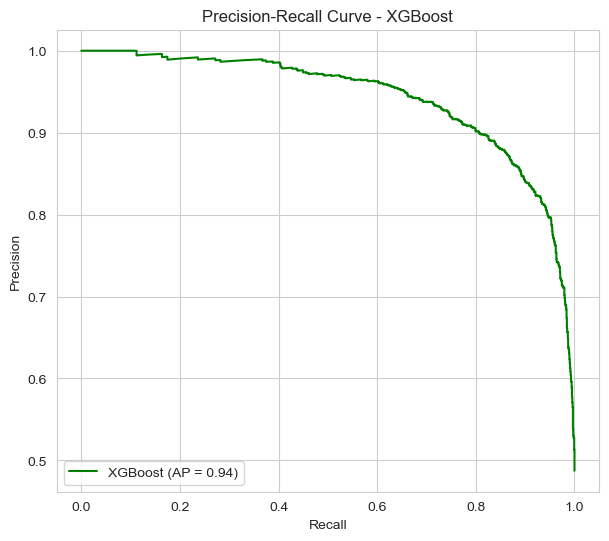

In [68]:
precision, recall, thresholds = precision_recall_curve(y_test_2, y_prob_xgb)
avg_precision = average_precision_score(y_test_2, y_prob_xgb)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, label=f'XGBoost (AP = {avg_precision:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

##### Conclusion:
- Precision stays above 0.9 (or 90%) for most of the curve.
- This means that when the model says a customer will churn, it's correct more than 90%(precision) of the time even when it is catching 60–80% of churners.
- AP (Average Precision) is 0.94 which is excellent. It means the model is making very confident and correct churn predictions overall.

##### 3. Gradient Boosting Tuning

In [69]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingClassifier(random_state=42)

gb_search = RandomizedSearchCV(estimator=gb,
                               param_distributions=gb_params,
                               n_iter=20,
                               cv=5,
                               verbose=2,
                               n_jobs=-1,
                               scoring='recall')

gb_search.fit(x_train_scaled_2, y_train_2)

print("Best Gradient Boosting Parameters:", gb_search.best_params_)

y_pred_gb = gb_search.best_estimator_.predict(x_test_scaled_2)
print('Gradient Boosting Recall Score:', recall_score(y_test_2, y_pred_gb))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Gradient Boosting Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2}
Gradient Boosting Recall Score: 0.8795878943979395


##### Precision - recall curve of Gradient Boosting model

In [70]:
best_gb = gb_search.best_estimator_

y_pred_gb = best_gb.predict(x_test_scaled_2)
y_prob_gb = best_gb.predict_proba(x_test_scaled_2)[:,1]

gb_fpr, gb_tpr, gb_threshold = roc_curve(y_test_2, y_prob_gb)

auc = roc_auc_score(y_test_2, y_prob_gb)

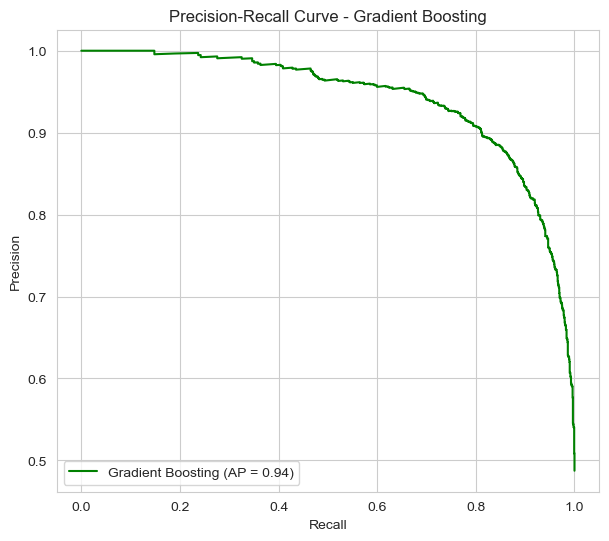

In [71]:
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y_test_2, y_prob_gb)
avg_precision_gb = average_precision_score(y_test_2, y_prob_gb)

plt.figure(figsize=(7,6))
plt.plot(recall_gb, precision_gb, label=f'Gradient Boosting (AP = {avg_precision_gb:.2f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gradient Boosting')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

##### Conclusion:
- This is also as good as the XGBoost Curve

In [72]:
models = {
    "Random Forest": best_rf,        
    "XGBoost": best_xgb,
    "Gradient Boosting": best_gb
}

for name, model in models.items():
    print(f"\n--- {name} ---")
    y_pred = model.predict(x_test_scaled_2)
    y_prob = model.predict_proba(x_test_scaled_2)[:, 1]

    print("Accuracy :", round(accuracy_score(y_test_2, y_pred), 4))
    print("Precision:", round(precision_score(y_test_2, y_pred), 4))
    print("Recall   :", round(recall_score(y_test_2, y_pred), 4))
    print("F1-Score :", round(f1_score(y_test_2, y_pred), 4))
    print("ROC AUC  :", round(roc_auc_score(y_test_2, y_prob), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test_2, y_pred))


--- Random Forest ---
Accuracy : 0.8588
Precision: 0.8462
Recall   : 0.868
F1-Score : 0.857
ROC AUC  : 0.9341
Confusion Matrix:
 [[1388  245]
 [ 205 1348]]

--- XGBoost ---
Accuracy : 0.8713
Precision: 0.8615
Recall   : 0.877
F1-Score : 0.8692
ROC AUC  : 0.9449
Confusion Matrix:
 [[1414  219]
 [ 191 1362]]

--- Gradient Boosting ---
Accuracy : 0.8704
Precision: 0.858
Recall   : 0.8796
F1-Score : 0.8687
ROC AUC  : 0.9422
Confusion Matrix:
 [[1407  226]
 [ 187 1366]]


### Feature Importance

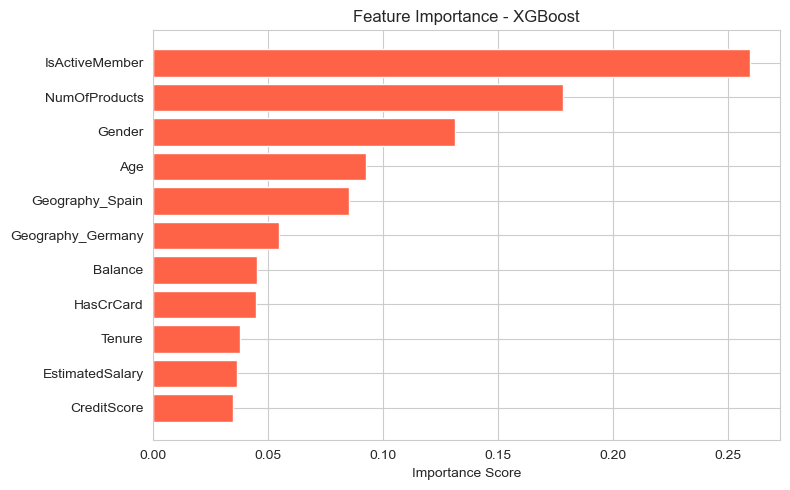

In [83]:
importances = best_xgb.feature_importances_
features = x_train_2.columns  # Getting feature names from original unscaled DataFrame

# Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='tomato')
plt.xlabel("Importance Score")
plt.title("Feature Importance - XGBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

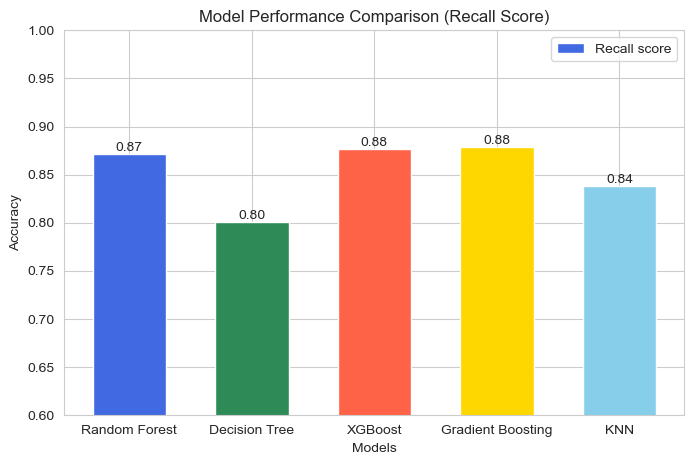

In [85]:
# Model names and their accuracies
models = ["Random Forest", "Decision Tree", "XGBoost", "Gradient Boosting", "KNN"]
Recall = [0.872, 0.801, 0.877, 0.879, 0.838]

x = np.arange(len(models))  # Label locations
width = 0.6  # Bar width

fig, ax = plt.subplots(figsize=(8, 5))

colors = ['royalblue', 'seagreen', 'tomato', 'gold', 'skyblue']
# Plot bars
bars_test = ax.bar(x, Recall, width, label="Recall score", color=colors)

# Annotate bars with accuracy values
for bar in bars_test:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Model Performance Comparison (Recall Score)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0.6, 1)  # Set y-axis limits for better visualization

# Show the plot
plt.show()

## `Conclusion`:
### XGBoost is the winner
XGBoost performs the best in 4 out of 5 metrics:
- Highest Accuracy  - **87.13%**
- Highest Precision - **86.15%**
- Highest F1 Score  - **87.70%**
- Highest ROC AUC   - **94.49%**

It only loses slightly to Gradient Boosting in Recall, but even then, it’s very close (0.877 vs. 0.8796).

So, XGBoost is our **top model overall — and it’s well-balanced across all performance metrics.**

### Saving the model

In [76]:
import joblib

# Save the model to a file
joblib.dump(best_xgb, 'best_xgboost_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [77]:
# Load the saved model
loaded_model = joblib.load('best_xgboost_model.pkl')

# Predict using loaded model
y_pred_loaded = loaded_model.predict(x_test_scaled_2)

## `Model Performance Summary`:

We tested several machine learning models to predict customer churn in a bank. After performing hyperparameter tuning to improve generalization and boost recall, here's what we observed:

- **Random Forest** initially showed decent performance but slightly lagged behind the boosting models. After tuning, it achieved an accuracy of 85.88% and a recall of 86.8%. While reliable and stable, its precision and AUC were lower compared to the other models.

- **Gradient Boosting** showed the highest recall of 87.96%, making it particularly effective at capturing churned customers. It had a strong F1-score (86.87%) and a high ROC AUC of 94.22%, indicating it was highly effective in identifying positive churn cases without sacrificing too much precision.

- **XGBoost** emerged as the best overall model, with a test accuracy of 87.13%, a recall of 87.7%, and the highest ROC AUC of 94.49%. This makes it the most balanced and robust classifier for our use case, especially when both recall and overall classification quality matter.

- **Feature importance** analysis showed that variables like **Account Balance**, **Activity Status**, and **Number of Products** had the strongest impact on churn prediction.

Finally, the **ROC curves confirmed that XGBoost had the most favorable trade-off between sensitivity and specificity, reinforcing it as the top-performing model.**

##  `Top 10 Key Insights`:
1. **Customer Activity:**
Churn Rate among inactive customers is 52.1%, compared to just 14.3% for active ones.
- *Activity status is a major churn predictor.*

2. **Number of Products:**
Customers with 3+ products churn at 46.8%, while those with 1 product churn at just 17.2%.
- *Upselling beyond 2 products may backfire.*

3. **Account Balance:**
Churn rate for customers with a balance > ₹150K is 39.6%, while for those below ₹50K, it’s only 16.5%.
- *High-value clients are at higher risk.*

4. **Tenure:**
Customers with tenure of 4–6 years churn at 31.8%, compared to <20% for newer (0–2 years) and long-term (9–10 years) customers.
- *Mid-tenure clients need attention.*

5. **Age Group:**
Customers aged 35–50 churn at 28.7%, the highest across all age brackets.
- *Middle-aged customers are more likely to explore competitors.*

6. **Credit Score:**
Churn is highest (33.4%) in the 600–700 score range, vs. 18.5% in the >800 group.
- *Average credit score users may feel underserved.*

7. **Geography:**
Germany shows a churn rate of 46.3%, compared to France (16.7%) and Spain (19.5%).
- *Country-specific strategies are required.*

8. **Gender:**
Female churn rate is 27.5%, slightly higher than male at 24.9%.
- *Gender isn't the strongest factor but worth exploring via personalization.*

9. **Estimated Salary:**
Churn is evenly spread across salary ranges, indicating income is not a strong churn driver.

10. **Top Influencing Features (XGBoost Feature Importance):**
Balance, Age, Credit Score, Num of Products, IsActiveMember are top drivers of churn.
- *Model interpretation aligns with SQL insights.*

## `10 Business Actions & Recommendations`:

1. **Engagement Campaign for Inactive Users**
- Target the 22% inactive customers with reward-based reactivation offers and personalized messages.

2. **Optimize Cross-Selling Strategy**
- Limit aggressive upselling beyond 2 products. Introduce “build your own bundle” features to reduce 46.8% churn in multi-product holders.

3. **High-Balance Loyalty Program**
- Prioritize top 25% balance holders with VIP support, cashback, or relationship managers.

4. **Mid-Tenure Touchpoints**
- Automate service quality surveys for customers in the 4–6 year window (31.8% churners).

5. **Age-Specific Services**
- Create financial wellness campaigns for the 35–50 age group, highlighting investment tools and retirement plans.

6. **Credit Score Education**
- Launch credit improvement support for 600–700 score users (~30% of base), linking score improvements to better offers.

7. **Localized Retention Teams**
- Deploy special task forces in Germany to diagnose root causes and implement in-country retention strategies.

8. **Explore Gender Preferences**
- Conduct A/B testing of features or comms style by gender to address minor but notable churn gaps.

9. **Predict & Prevent with ML Model**
- Integrate churn prediction model in CRM to trigger proactive retention workflows when churn probability crosses 0.6.

10. **Continuous Feedback Loop**
- Survey both loyal (10+ yrs) and churned customers quarterly to fine-tune offers and model accuracy.

### --------------------------------------------------------------------------------------------------------------------------------------------------------